<a href="https://colab.research.google.com/github/suba2305/TSALAB/blob/main/TSA_EX_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

In [77]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AirPassengers.csv", parse_dates=["Month"], index_col="Month")

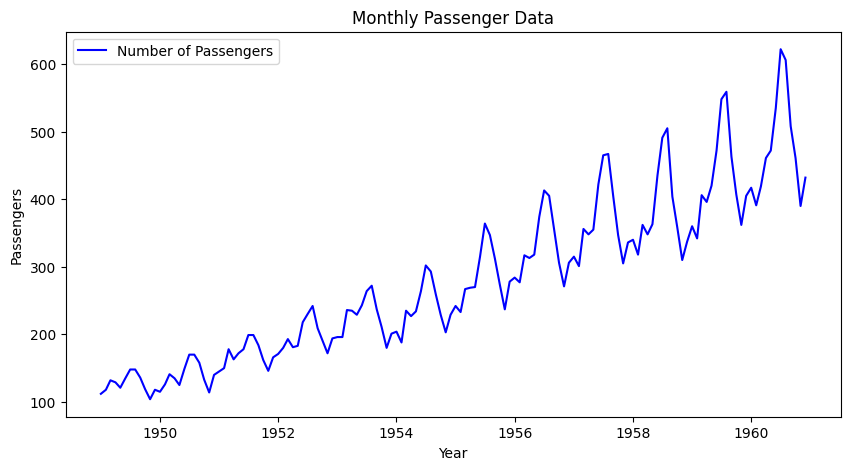

In [78]:
# Visualize the dataset
plt.figure(figsize=(10, 5))
plt.plot(df, label="Number of Passengers", color="blue")
plt.title("Monthly Passenger Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [79]:
# ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

In [80]:
# Check stationarity
adf_test(df["#Passengers"])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Data is NOT stationary


In [81]:
# Apply Differencing (if needed)
df_diff = df.diff().dropna()  # First-order differencing
adf_test(df_diff["#Passengers"])  # Re-check stationarity

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Data is NOT stationary


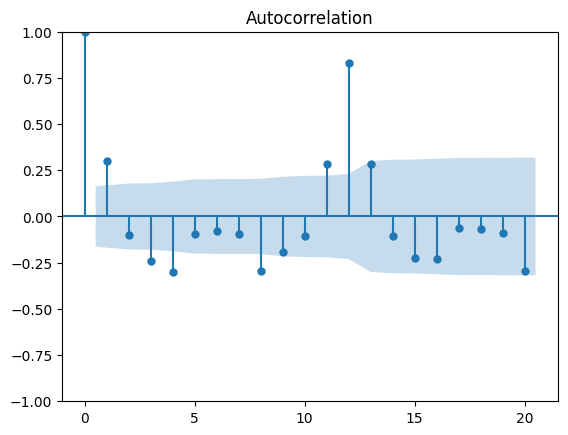

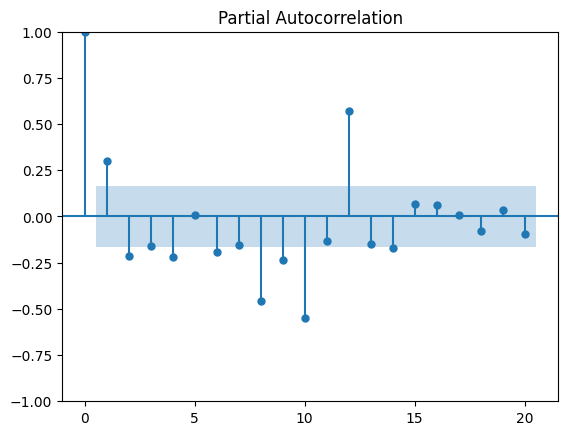

In [82]:
# Plot ACF & PACF to determine (p, d, q)
sm.graphics.tsa.plot_acf(df_diff, lags=20)  # Identifies q (MA component)
sm.graphics.tsa.plot_pacf(df_diff, lags=20) # Identifies p (AR component)
plt.show()

In [83]:
# Fit ARIMA Model
arima_model = ARIMA(df, order=(2, 1, 2))  # Example: p=2, d=1, q=2
arima_fit = arima_model.fit()
print(arima_fit.summary())

df["ARIMA_Forecast"] = arima_fit.predict(start=len(df)-12, end=len(df)-1, dynamic=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 01 Apr 2025   AIC                           1353.347
Time:                        04:07:00   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Fit SARIMA Model
sarima_model = SARIMAX(df["#Passengers"], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))  # Example seasonal parameters
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

df["SARIMA_Forecast"] = sarima_fit.predict(start=len(df)-12, end=len(df)-1, dynamic=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Tue, 01 Apr 2025   AIC                           1020.048
Time:                                      03:27:17   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

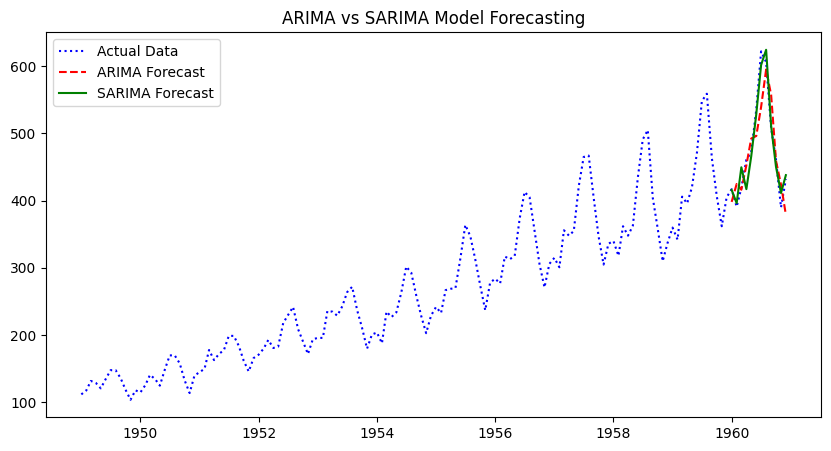

In [10]:
# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df["#Passengers"], label="Actual Data", linestyle="dotted", color="blue")
plt.plot(df["ARIMA_Forecast"], label="ARIMA Forecast", linestyle="dashed", color="red")
plt.plot(df["SARIMA_Forecast"], label="SARIMA Forecast", color="green")
plt.legend()
plt.title("ARIMA vs SARIMA Model Forecasting")
plt.show()

In [11]:
# Forecast Future Values
future_steps = 12  # Predict next 12 months
arima_forecast = arima_fit.forecast(steps=future_steps)
sarima_forecast = sarima_fit.forecast(steps=future_steps)

In [12]:
# Print forecast values
print("ARIMA Future Forecast:")
print(arima_forecast)
print("SARIMA Future Forecast:")
print(sarima_forecast)

ARIMA Future Forecast:
1961-01-01    439.854513
1961-02-01    465.296054
1961-03-01    500.665761
1961-04-01    535.971659
1961-05-01    561.690109
1961-06-01    571.314405
1961-07-01    562.974263
1961-08-01    539.731146
1961-09-01    508.529538
1961-10-01    478.147818
1961-11-01    456.746809
1961-12-01    449.695642
Freq: MS, Name: predicted_mean, dtype: float64
SARIMA Future Forecast:
1961-01-01    447.282877
1961-02-01    423.662345
1961-03-01    458.439641
1961-04-01    497.170330
1961-05-01    509.641216
1961-06-01    569.122957
1961-07-01    656.746226
1961-08-01    642.645825
1961-09-01    547.715459
1961-10-01    498.258549
1961-11-01    429.640626
1961-12-01    473.373664
Freq: MS, Name: predicted_mean, dtype: float64
